In [1]:
import pickle
import numpy
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
from datetime import datetime


with open('pop_rate_0809_18_51.pkl', 'rb') as f:
    data_70 = pickle.load(f)


with open('low_rmp_80mV_pop_rate_0812_16_21.pkl', 'rb') as f:
    data_80 = pickle.load(f)




In [9]:
def get_decision_time(pop_rate, threshold=25):
    rate_A = pop_rate['pop_rate_a']
    rate_B = pop_rate['pop_rate_b']
    
    above_thre_A = (pop_rate['pop_rate_a'] > threshold)
    idx_over_threshold_A = numpy.where(above_thre_A==True)


    above_thre_B = (pop_rate['pop_rate_b'] > threshold)
    idx_over_threshold_B = numpy.where(above_thre_B==True)


    # monitor each firing rate at every moment 
    decision_time_A = 0

    decision_time_B = 0

    for i in range(len(above_thre_A)):

        # find the time when the divergen starts happening

        above_thre_A = (rate_A > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (rate_B > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)



    if len(idx_over_threshold_A[0]) > 0:
        decision_time_A = idx_over_threshold_A[0][0];
        
    else: 
        pass

    if len(idx_over_threshold_B[0]) > 0:
        decision_time_B = idx_over_threshold_B[0][0];

    else: 
        pass
    

    #print(decision_time_A, decision_time_B)
    return decision_time_A, decision_time_B



In [10]:
def decision_time(data):
    decision_times = []
    rt = []

    for i in range(len(data)):
        
        decision_time = get_decision_time(data[i])
        
        decision_times.append(decision_time)
        rt.append(max(decision_time))
    
    return rt

            

In [11]:
rt_70 = decision_time(data_70)

In [12]:
rt_80 = decision_time(data_80)

In [14]:
rt_70_realtime = numpy.array(rt_70) - 1000
rt_70_realtime = rt_70_realtime/10

rt_80_realtime = numpy.array(rt_80) - 1000
rt_80_realtime = rt_80_realtime/10



In [17]:
rt_list=[rt_70_realtime,rt_80_realtime]

In [21]:
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")


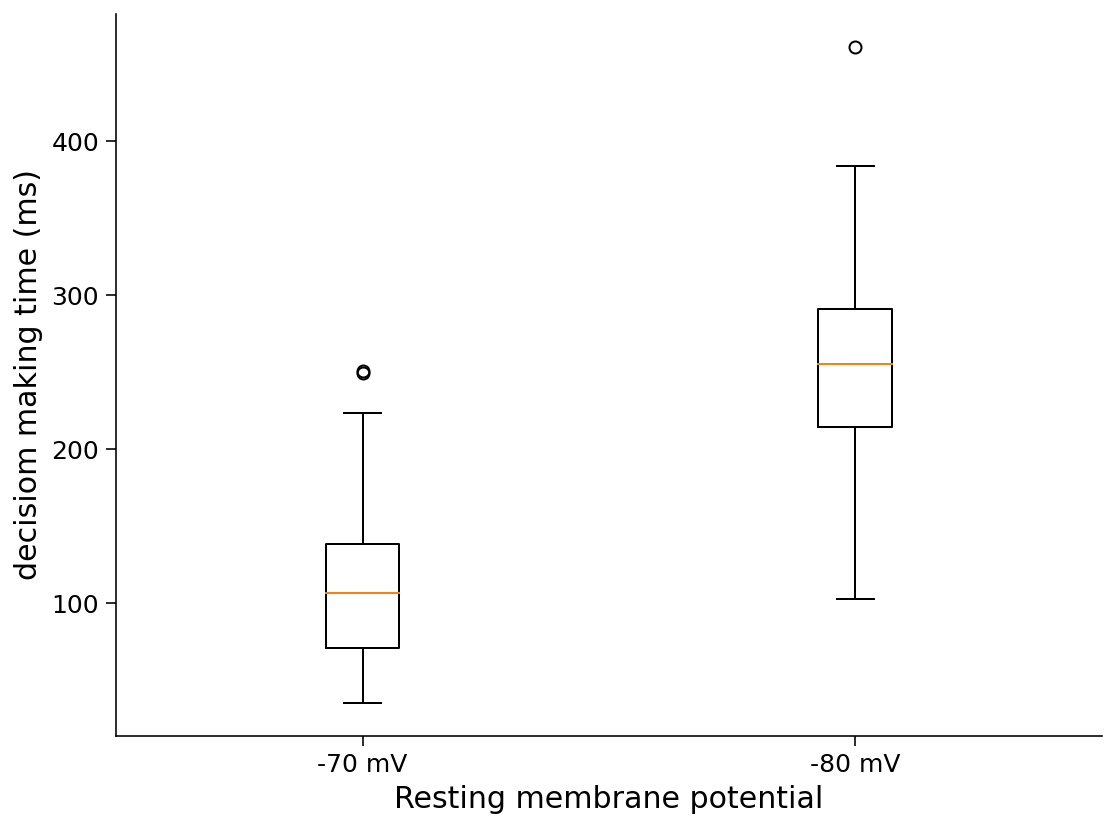

In [27]:
plt.boxplot(rt_list)
plt.ylabel('decisiom making time (ms)')
plt.xlabel('Resting membrane potential')

plt.xticks([1, 2], ['-70 mV', '-80 mV'])

plt.show()